In [2]:
!pip install similaritymeasures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for similaritymeasures: filename=similaritymeasures-0.7.0-py3-none-any.whl size=15452 sha256=16db5927ef7e4c67792322fb48e163daa0b69813b81fc17a02ee68c43c370a84
  Stored in directory: /root/.cache/pip/wheels/24/a6/80/6f1676caf08ab1b69d74c8a727c96fdd3903d891672b415008
Successfully built similaritymeasures


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Hegarty Lab RA Folder/SilctonDSPSHQ-22Summer/NewDesktopDSPDataProcessing

/content/drive/MyDrive/Hegarty Lab RA Folder/SilctonDSPSHQ-22Summer/NewDesktopDSPDataProcessing


In [1]:
from analysis import Loader, Constants
from analysis import MovementAnalyzer, RotationAnalyzer
import pandas as pd
import numpy as np
from analysis import ShortcutMap, Strategy
import random

In [6]:
pd.set_option('display.max_column', 500)

constant = Constants(alt=True)

loader = Loader(constant, data_dir="data_alt", extra_dir="extra", image_dir="images")
loader.load(learning=True, force=True) # Use force to skip missing files

shortcut_map = ShortcutMap(constant, "extra/shortcut_walls_2.csv", "extra/objects_2.csv", "shortcut_path_2.csv")
learning_map = ShortcutMap(constant, "extra/learning_walls_2.csv", "extra/objects_2.csv", learning=True)

strategy = Strategy("extra/strategy_map_2.txt", "extra/strategy_landmarks_2.txt")
# strategy_1.get_all_topological_plots("topo_plot", save_only=True)


Cannot load rotation file, skipping
ShortcutMap: Loaded 12 objects
Saving shortest distances to shortcut_path_2.csv
ShortcutMap: Loaded 12 objects
Saving shortest distances to learning_paths.csv
Saving shortest distances to reverse_learning_paths.csv


In [7]:
# Currently the movement analyzer can only handle normal (not alternative) trials, will add that later this week
movement_analyzer = MovementAnalyzer(loader, shortcut_map=shortcut_map, learning_map=learning_map, strategy=strategy)

# rotation analyzer gives the absolute angular error for each trial (both normal and alternative)
# rotation_analyzer = RotationAnalyzer(loader)

In [8]:
efficiencies = movement_analyzer.calculate_efficiency_for_all_subjects()
#print(efficiencies)

failures = movement_analyzer.calculate_failure_for_all_subjects()
#print(failures)

wayfinding processing: A
Error in A, 5, skipping...


In [9]:
# calculate Frechet Distances for each trajectory
frechet_distances = movement_analyzer.calculate_frechet_for_all_subjects()

Frechet processing: A
TypeError: A 5


In [10]:
frechet_table = pd.DataFrame.from_dict(frechet_distances).transpose()

# assume your data is stored in a pandas DataFrame called df
# with participant names as index and trial numbers as columns

# define a function to check if the shortcut value is minimum among ('shortcut', 'shortcut_reversed', 'lean', 'topo')

def is_shortest(col):
    shortcuts = [col['learn'], col['learn_reversed'], col['shortcut'], col['topo']]
    check = col['shortcut'] == min(shortcuts) and col['failure'] == 0
    return check

def process_each_subject(row):
    return row.apply(is_shortest).sum()

# use pandas' apply method to apply the is_shortest function to each row of the DataFrame
# then use pandas' sum method to count the number of rows where failure == 0 and shortcut is the minimum value
num_shortcut = frechet_table.apply(lambda row: row.apply(is_shortest).sum(), axis=1)

# change the row indexing to a column
num_shortcut = num_shortcut.reset_index()
# change the only column name to 'solution_index'
num_shortcut = num_shortcut.rename(columns={0:'num_shortcut','index':'subID'})

In [12]:
eff = pd.DataFrame.from_dict(efficiencies).transpose()
eff = eff.reset_index().rename(columns = {'index':'subID'})
sub_failure = pd.DataFrame(failures,index=[0]).transpose().reset_index().rename({'index':'subID',0:'num_failures'},axis=1)
# point_err = pd.DataFrame.from_dict(errors).transpose()
# point_err = point_err.reset_index().rename(columns = {'index':'subID'})
eff['eff_avg'] = eff.iloc[:,1:].mean(axis=1)
# point_err['point_avg'] = point_err.iloc[:,1:].mean(axis=1)
dsp_sub = eff[['subID','eff_avg']]\
    .merge(sub_failure,on='subID').merge(num_shortcut,on='subID')
dsp_sub['solution_index'] = dsp_sub['num_shortcut']/(20-dsp_sub['num_failures'])
dsp_sub

,subID,eff_avg,num_failures,num_shortcut,solution_index
0,A,1.276199,2,15,0.833333


<Axes: >

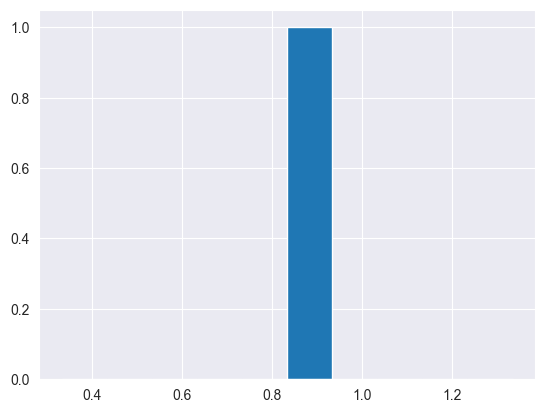

In [13]:
dsp_sub.solution_index.hist()

In [14]:
dsp_sub.to_csv("dsp_sub_2.csv",index=False)

ValueError: Could not interpret value `point_avg` for parameter `y`

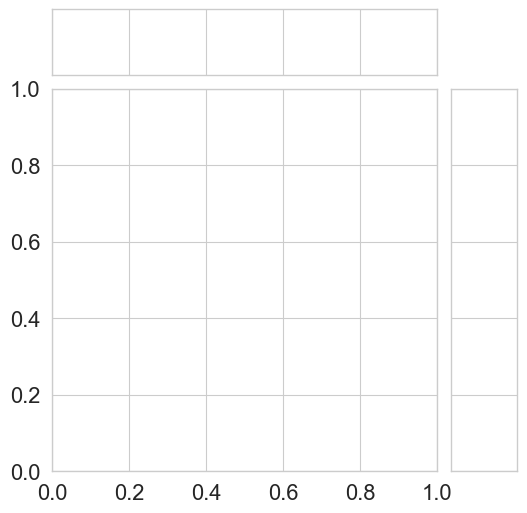

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)
g = sns.jointplot(data=dsp_sub, y="point_avg", x="eff_avg")
g.ax_joint.set_ylabel('Point Error', fontweight='bold')
g.ax_joint.set_xlabel('Travel Efficiency', fontweight='bold')
g.ax_joint.plot([1,3], [90,90], 'r--', linewidth = 2)
g.ax_joint.plot([2.55,2.55],[5,110] , 'r--', linewidth = 2)
plt.show()

In [16]:
movement_analyzer.export_distance_summary("distance_summary_2.csv")

TypeError: A 5
IndexError: A 5, skipping...


In [18]:
movement_analyzer.export_processed_data_for_all_subjects(folder="processed_data_2")

Error in A, 5, skipping...
Error in A, 5, skipping...


A, 3
A, 4
TypeError: A 5
A, 6
A, 7
A, 8
A, 9
A, 10
A, 11
A, 12
A, 13
A, 14
A, 15
A, 16
A, 17
A, 18
A, 19
A, 20
A, 21
A, 22


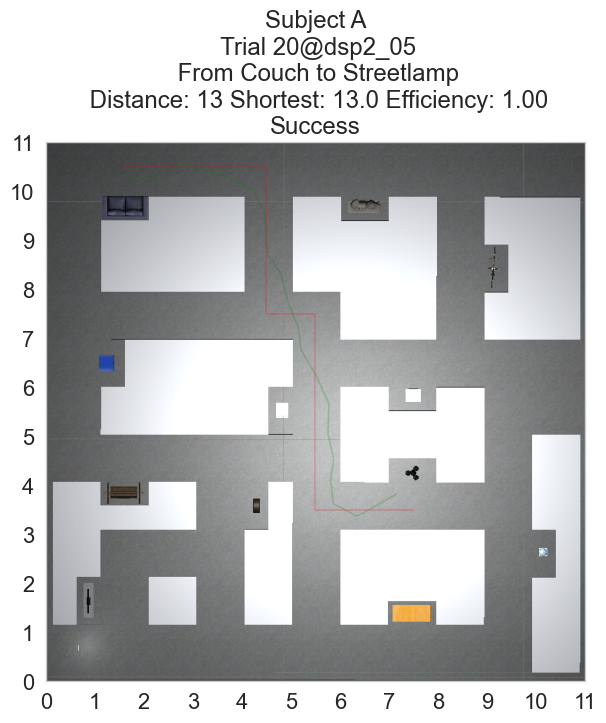

In [22]:
# can set up excluding
movement_analyzer.plots_for_all_subjects(folder="path_plot_2", save_only = True)

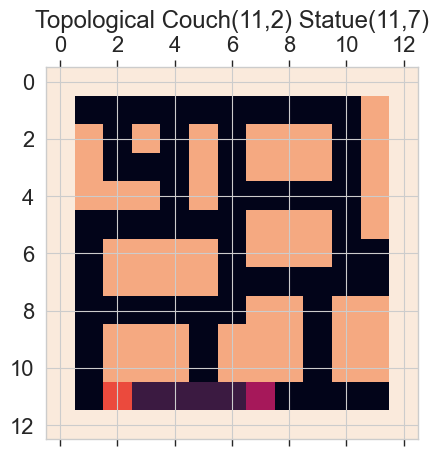

In [21]:
movement_analyzer.plot_all_topological_paths(folder="topo_plot_2", save_only=True)